In [7]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, precision_recall_fscore_support
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
file_path = 'Resources/Diabetes_Data.csv'
df = pd.read_csv('Resources/Diabetes_Data.csv')

# Define features and target variable
X = df[['HighBP', 'GenHlth', 'Education', 'Income',]]
y = df['Diabetes_binary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Train a different model, e.g., RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_res, y_train_res)

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

Confusion Matrix:
[[29712 14027]
 [ 1742  5255]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.68      0.79     43739
         1.0       0.27      0.75      0.40      6997

    accuracy                           0.69     50736
   macro avg       0.61      0.72      0.60     50736
weighted avg       0.85      0.69      0.74     50736


Accuracy Score: 0.6891950488804793

ROC AUC Score: 0.7852904124532563

Precision: 0.27253396950523806

Recall: 0.7510361583535801

F1 Score: 0.39993911488260586


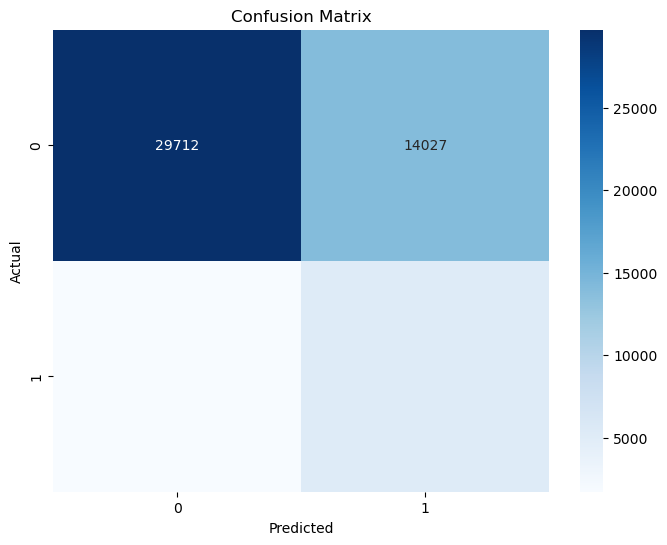

In [8]:
# Evaluate the model using various metrics
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_rf, average='binary')

print("Confusion Matrix:")
print(conf_matrix_rf)
print("\nClassification Report:")
print(class_report_rf)
print("\nAccuracy Score:", accuracy_rf)
print("\nROC AUC Score:", roc_auc_rf)
print("\nPrecision:", precision)
print("\nRecall:", recall)
print("\nF1 Score:", f1)

# Confusion Matrix Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

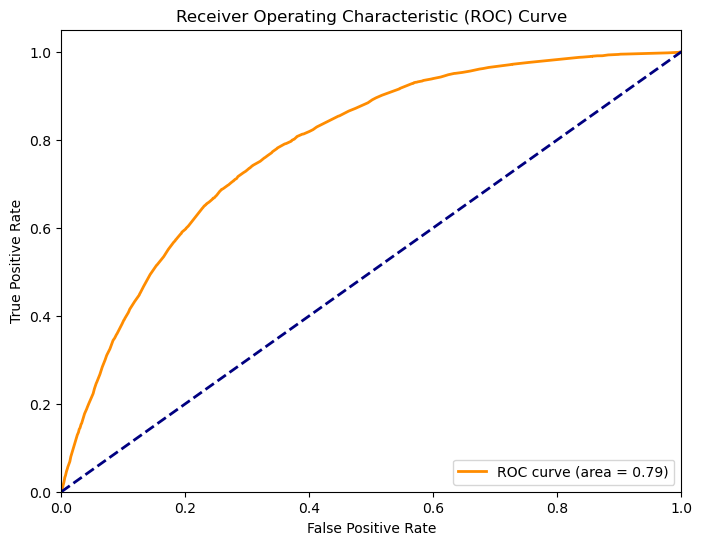

In [9]:
# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_rf)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

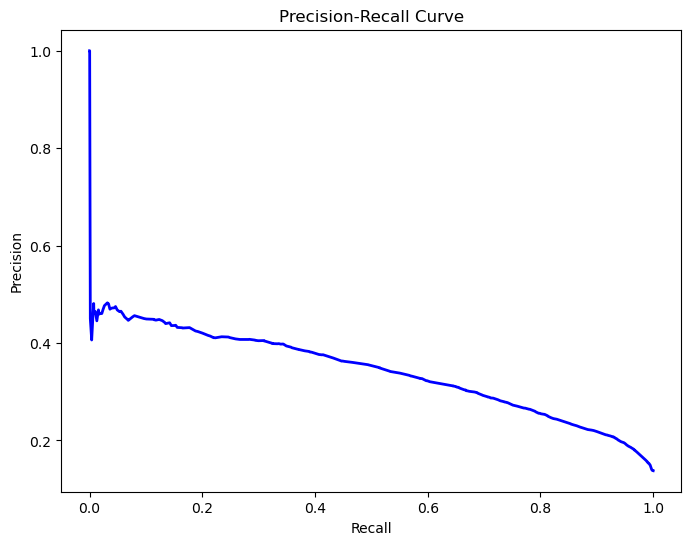

In [10]:
# Compute Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba_rf)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

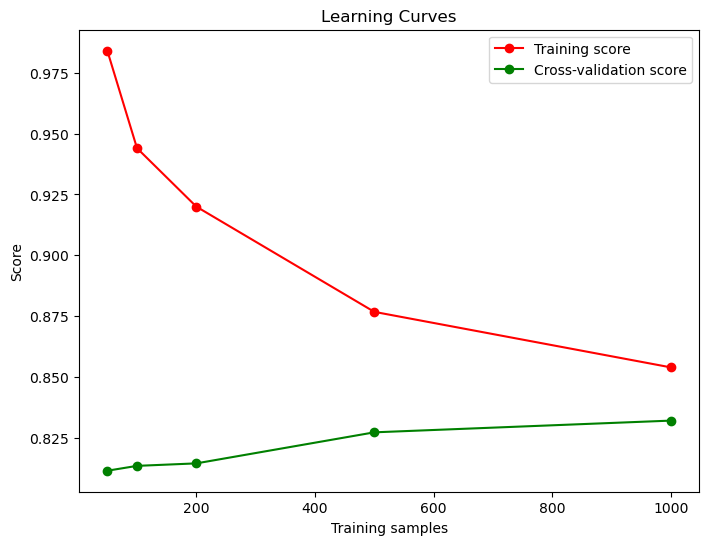

In [11]:
#Learning Curve
train_sizes, train_scores, valid_scores = learning_curve(
    RandomForestClassifier(random_state=42), X, y, train_sizes=[50, 100, 200, 500, 1000], cv=5
)

train_scores_mean = np.mean(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, valid_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.xlabel('Training samples')
plt.ylabel('Score')
plt.title('Learning Curves')
plt.legend(loc='best')
plt.show()